In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('D:/TextProj/train.csv')

In [3]:
print(df.head())

      id    target                                       comment_text  \
0  59848  0.000000  This is so cool. It's like, 'would you want yo...   
1  59849  0.000000  Thank you!! This would make my life a lot less...   
2  59852  0.000000  This is such an urgent design problem; kudos t...   
3  59855  0.000000  Is this something I'll be able to install on m...   
4  59856  0.893617               haha you guys are a bunch of losers.   

   severe_toxicity  obscene  identity_attack   insult  threat  asian  atheist  \
0         0.000000      0.0         0.000000  0.00000     0.0    NaN      NaN   
1         0.000000      0.0         0.000000  0.00000     0.0    NaN      NaN   
2         0.000000      0.0         0.000000  0.00000     0.0    NaN      NaN   
3         0.000000      0.0         0.000000  0.00000     0.0    NaN      NaN   
4         0.021277      0.0         0.021277  0.87234     0.0    0.0      0.0   

   ...  article_id    rating  funny  wow  sad  likes  disagree  \
0  ...  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 45 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   target                               float64
 2   comment_text                         object 
 3   severe_toxicity                      float64
 4   obscene                              float64
 5   identity_attack                      float64
 6   insult                               float64
 7   threat                               float64
 8   asian                                float64
 9   atheist                              float64
 10  bisexual                             float64
 11  black                                float64
 12  buddhist                             float64
 13  christian                            float64
 14  female                               float64
 15  heterosexual                    

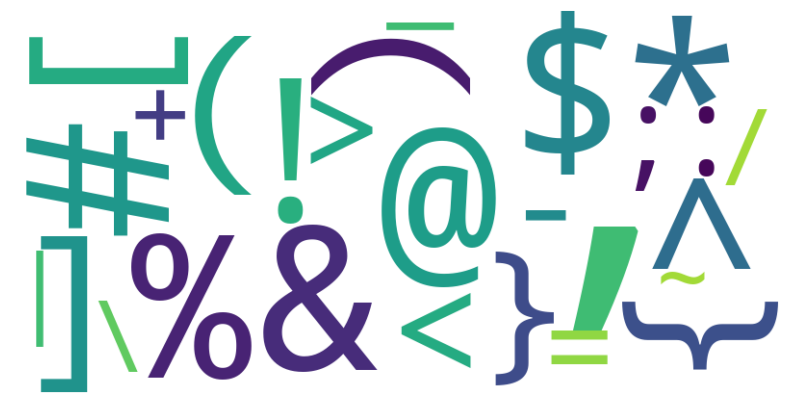

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
column_name = "comment_text"
colnvalspecchars = df[column_name]
# Finding all symbols and special characters
spec_characs = "!, @, #, $, %, ^, &, *, (, ), [, ], {, }, <, >, ;, :, -, =, +, _, /, \\, |, ~"
chracscnts = {}
for char in spec_characs:
    if char in chracscnts:
        chracscnts[char] += 1
    else:
        chracscnts[char] = 1

# Configuring WordCloud        
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(chracscnts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [6]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import re, string # Regular Expressions, String
from nltk.corpus import stopwords # stopwords
from nltk.stem.porter import PorterStemmer # for word stemming
from nltk.stem import WordNetLemmatizer # for word lemmatization
import unicodedata
import html
import nltk
nltk.download('stopwords')

# List of English stopwords
stop = set(stopwords.words('english'))

# Update stopwords to include punctuation marks too
stop.update(list(string.punctuation))

def clean_text(text):

    # Remove unwanted html characters
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
    'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
    '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
    ' @-@ ', '-').replace('\\', ' \\ ')
    text = re1.sub(' ', html.unescape(x1))

    # Remove non-ascii characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # remove between square brackets
    text = re.sub('\[[^]]*\]', '', text)

    # remove URLs
    text = re.sub(r'http\S+', '', text)

    # remove twitter tags
    text = text.replace("@", "")

    # remove hashtags
    text = text.replace("#", "")

    # remove all non-alphabetic characters
    text = re.sub(r'[^a-zA-Z ]', '', text)

    # remove stopwords from text
    final_text = []
    for word in text.split():
        if word.strip().lower() not in stop:
            final_text.append(word.strip().lower())

    text = " ".join(final_text)

    # lemmatize words
    lemmatizer = WordNetLemmatizer()
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    text = " ".join([lemmatizer.lemmatize(word, pos = 'v') for word in text.split()])

    # replace all numbers with "num"
    text = re.sub("\d", "num", text)

    return text.lower()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
import numpy as np

In [8]:
trainingdf = df
trainingdf['threat'] = np.where(trainingdf['threat'] >= .3, 1, 0)
trainingdf['severe_toxicity'] = np.where(trainingdf['severe_toxicity'] >= .3, 1, 0)
trainingdf['insult'] = np.where(trainingdf['insult'] >= .3, 1, 0)
trainingdf['obscene'] = np.where(trainingdf['obscene'] >= .3, 1, 0)
trainingdf['identity_attack'] = np.where(trainingdf['identity_attack'] >= .3, 1, 0)

In [9]:
possible_labels = ["comment_text","target","severe_toxicity", "obscene", "threat", "insult", "identity_attack"]

In [10]:
traindffinal = trainingdf[possible_labels]
#traindffinal = traindffinal[(traindffinal['target']>=.5)]
traindffinal.head(20)

,comment_text,target,severe_toxicity,obscene,threat,insult,identity_attack
0,"This is so cool. It's like, 'would you want yo...",0.000000,0,0,0,0,0
1,Thank you!! This would make my life a lot less...,0.000000,0,0,0,0,0
2,This is such an urgent design problem; kudos t...,0.000000,0,0,0,0,0
3,Is this something I'll be able to install on m...,0.000000,0,0,0,0,0
4,haha you guys are a bunch of losers.,0.893617,0,0,0,1,0
5,ur a sh*tty comment.,0.666667,0,1,0,1,0
6,hahahahahahahahhha suck it.,0.457627,0,1,0,0,0
7,FFFFUUUUUUUUUUUUUUU,0.000000,0,0,0,0,0
8,The ranchers seem motivated by mostly by greed...,0.000000,0,0,0,0,0
9,It was a great show. Not a combo I'd of expect...,0.000000,0,0,0,0,0


In [11]:
possible_labels1 = ["severe_toxicity", "obscene", "threat", "insult", "identity_attack"]

In [12]:
len(traindffinal)

1804874

In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abhay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
traindffinal['clean_comment_text'] = traindffinal['comment_text'].apply(clean_text)

C:\Users\abhay\AppData\Local\Temp\ipykernel_10156\1390700775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindffinal['clean_comment_text'] = traindffinal['comment_text'].apply(clean_text)


In [15]:
traindffinal.head(5)

,comment_text,target,severe_toxicity,obscene,threat,insult,identity_attack,clean_comment_text
0,"This is so cool. It's like, 'would you want yo...",0.000000,0,0,0,0,0,cool like would want mother read really great ...
1,Thank you!! This would make my life a lot less...,0.000000,0,0,0,0,0,thank would make life lot le anxietyinducing k...
2,This is such an urgent design problem; kudos t...,0.000000,0,0,0,0,0,urgent design problem kudos take impressive
3,Is this something I'll be able to install on m...,0.000000,0,0,0,0,0,something ill able install site release
4,haha you guys are a bunch of losers.,0.893617,0,0,0,1,0,haha guy bunch loser


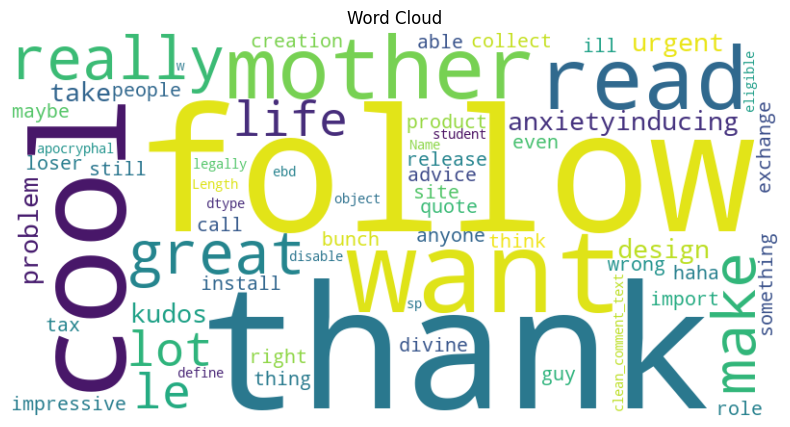

In [16]:
columnname = "clean_comment_text"
columnvalue = traindffinal[columnname]
wordcloudvalue = WordCloud(width=800, height=400, background_color='white').generate(str(columnvalue))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudvalue, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

(array([1.240732e+06, 3.520230e+05, 1.874190e+05, 2.468500e+04,
        1.200000e+01, 2.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([  0. ,  30.4,  60.8,  91.2, 121.6, 152. , 182.4, 212.8, 243.2,
        273.6, 304. ]),
 <BarContainer object of 10 artists>)

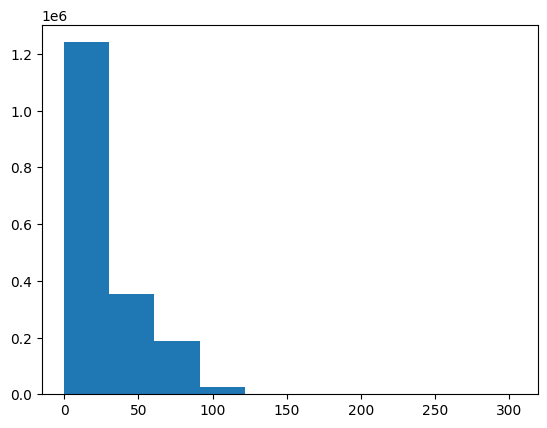

In [17]:
import matplotlib.pyplot as plt
plt.hist(list(traindffinal['clean_comment_text'].str.split().map(lambda x: len(x))))

In [18]:
train_median_len = np.median(np.array(traindffinal['clean_comment_text'].str.split().map(lambda x: len(x))))
print(train_median_len)

18.0


In [19]:
embedding_dict = pd.read_pickle('D:\TextProj\glove.840B.300d.pkl')

In [20]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
vocab_size = 10000
tokenizer = Tokenizer(num_words = vocab_size, oov_token = 'UNK')
tokenizer.fit_on_texts(list(traindffinal['clean_comment_text']))
X_train_seq = tokenizer.texts_to_sequences(traindffinal['clean_comment_text'])
X_train_seq = pad_sequences(X_train_seq, maxlen = int(train_median_len), truncating = 'post', padding = 'post')
print(f"X_train shape: {X_train_seq.shape}")

X_train shape: (1804874, 18)


In [21]:
y_train = np.array(traindffinal[possible_labels1]).astype(int)
print(f"y_train shape: {y_train.shape}")

y_train shape: (1804874, 5)


In [22]:
from sklearn.model_selection import train_test_split

X_train_seq, X_val_seq, y_train, y_val = train_test_split(X_train_seq, y_train, test_size = 0.2, random_state = 42)

print(f"X_train shape: {X_train_seq.shape}")
print(f"X_val shape: {X_val_seq.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

X_train shape: (1443899, 18)
X_val shape: (360975, 18)
y_train shape: (1443899, 5)
y_val shape: (360975, 5)


In [23]:
num_words = len(tokenizer.word_index)
print(f"Number of unique words: {num_words}")

Number of unique words: 905841


In [24]:
embedding_matrix=np.zeros((num_words,300))

for word,i in tokenizer.word_index.items():
    if i < num_words:
        emb_vec = embedding_dict.get(word)
        if emb_vec is not None:
            embedding_matrix[i] = emb_vec

embedding_matrix.shape

(905841, 300)

In [25]:
from keras import layers
from keras.models import Sequential

def setup_lstm_model(max_len, n_latent_factors):

    model = Sequential()
    model.add(layers.Embedding(num_words, n_latent_factors, weights = [embedding_matrix],
                               input_length = max_len, trainable = False))
    model.add(layers.LSTM(units = max_len, return_sequences = True))
    model.add(layers.GlobalAveragePooling1D())
    model.add(layers.Dense(units = 5, activation = 'sigmoid'))

    return model

In [26]:
lstm_model = setup_lstm_model(max_len = int(train_median_len), n_latent_factors = 300)
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 18, 300)           271752300 
                                                                 
 lstm (LSTM)                 (None, 18, 18)            22968     
                                                                 
 global_average_pooling1d (  (None, 18)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 5)                 95        
                                                                 
Total params: 271775363 (1.01 GB)
Trainable params: 23063 (90.09 KB)
Non-trainable params: 271752300 (1.01 GB)
_________________________________________________________________


In [ ]:
lstm_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])

batch_size = 128
epochs = 13

lstm_model.fit(X_train_seq, y_train, epochs=epochs, batch_size = batch_size, validation_data = (X_val_seq, y_val))

Epoch 1/13
11281/11281 [==============================] - 368s 32ms/step - loss: 0.0855 - accuracy: 0.1049 - val_loss: 0.0778 - val_accuracy: 0.1079
Epoch 2/13
11281/11281 [==============================] - 366s 32ms/step - loss: 0.0762 - accuracy: 0.1076 - val_loss: 0.0761 - val_accuracy: 0.1084
Epoch 3/13
11281/11281 [==============================] - 407s 36ms/step - loss: 0.0748 - accuracy: 0.1080 - val_loss: 0.0753 - val_accuracy: 0.1083
Epoch 4/13
11281/11281 [==============================] - 362s 32ms/step - loss: 0.0740 - accuracy: 0.1081 - val_loss: 0.0752 - val_accuracy: 0.1092
Epoch 5/13
 2276/11281 [=====>........................] - ETA: 3:59 - loss: 0.0734 - accuracy: 0.1087

: 

In [ ]:
lstm_model.history.history

{'loss': [0.2394830286502838,
  0.18094919621944427,
  0.17120663821697235,
  0.16617310047149658,
  0.1627930998802185,
  0.16040582954883575,
  0.15840551257133484,
  0.15671895444393158,
  0.15535813570022583,
  0.15398377180099487,
  0.15296584367752075,
  0.15180526673793793,
  0.1508953720331192],
 'accuracy': [0.7657425999641418,
  0.7773736119270325,
  0.7851680517196655,
  0.7889613509178162,
  0.7904682755470276,
  0.7922782897949219,
  0.7927546501159668,
  0.7940363883972168,
  0.7950063943862915,
  0.7957944869995117,
  0.7962794303894043,
  0.7967904210090637,
  0.7977170944213867],
 'val_loss': [0.18980519473552704,
  0.17509415745735168,
  0.17010413110256195,
  0.16754595935344696,
  0.16580498218536377,
  0.16467514634132385,
  0.1646662801504135,
  0.16388455033302307,
  0.16358456015586853,
  0.16464932262897491,
  0.16508632898330688,
  0.1635541021823883,
  0.16345463693141937],
 'val_accuracy': [0.7687671184539795,
  0.7856722474098206,
  0.7894135117530823,
  0.

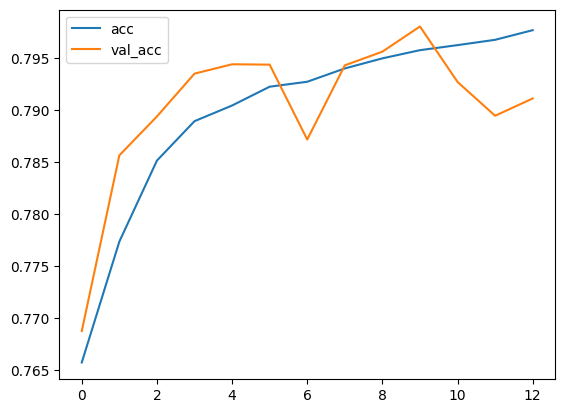

Training Accuracy is  : 0.7977170944213867
Validation Accuracy is: 0.798073947429657


In [ ]:
plt.plot(lstm_model.history.history['accuracy'], label='acc')
plt.plot(lstm_model.history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

print("Training Accuracy is  :",max(lstm_model.history.history['accuracy']))
print("Validation Accuracy is:",max(lstm_model.history.history['val_accuracy']))

In [ ]:
testdata = pd.read_csv('D:/TextProj/test.csv')

In [ ]:
testdata.head(5)

,id,comment_text
0,7097320,[ Integrity means that you pay your debts.]\n\...
1,7097321,This is malfeasance by the Administrator and t...
2,7097322,@Rmiller101 - Spoken like a true elitist. But ...
3,7097323,"Paul: Thank you for your kind words. I do, in..."
4,7097324,Sorry you missed high school. Eisenhower sent ...


In [ ]:
testdata['clean_comment_text'] = testdata['comment_text'].apply(clean_text)
test_median_len = np.median(np.array(testdata['clean_comment_text'].str.split().map(lambda x: len(x))))
print(test_median_len)

18.0


In [ ]:
lstm_model.save('dvdtect_model.h5')

c:\Users\abhay\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
